<a href="https://colab.research.google.com/github/johnnyclayton/happiness_report/blob/main/Happiness_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Happiness Report 2022**

In [49]:
from google.colab import drive
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import geopandas as gpd

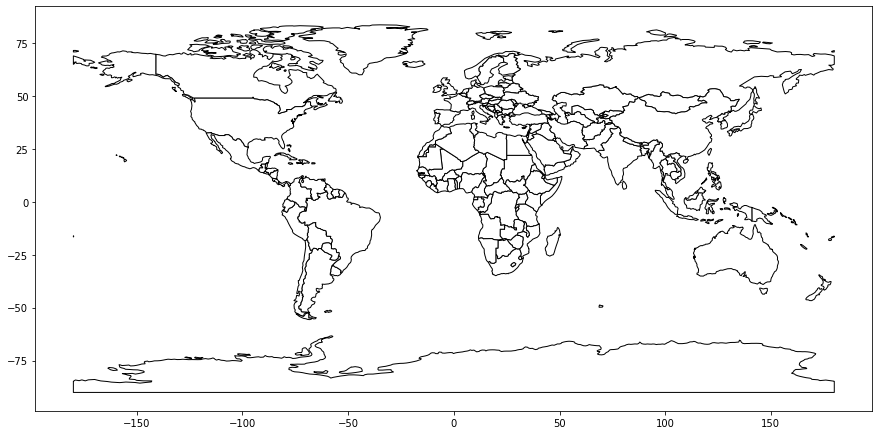

In [50]:
%matplotlib inline
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world.plot(figsize = (15,20), color='white', edgecolor='black')

In [6]:
drive.mount("/content/gdrive/")

Mounted at /content/gdrive/


In [7]:
path = "/content/gdrive/MyDrive/2022.csv"

In [8]:
data = pd.read_csv(path)
# dropping last row
data.drop(data.tail(1).index,inplace=True)

In [31]:
data.tail()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
141,142,Botswana*,3.471,3.667,3.275,0.187,1.503,0.815,0.280,0.571,0.012,0.102
142,143,Rwanda*,3.268,3.462,3.074,0.536,0.785,0.133,0.462,0.621,0.187,0.544
143,144,Zimbabwe,2.995,3.110,2.880,0.548,0.947,0.690,0.270,0.329,0.106,0.105
144,145,Lebanon,2.955,3.049,2.862,0.216,1.392,0.498,0.631,0.103,0.082,0.034
145,146,Afghanistan,2.404,2.469,2.339,1.263,0.758,0.000,0.289,0.000,0.089,0.005


<BarContainer object of 10 artists>

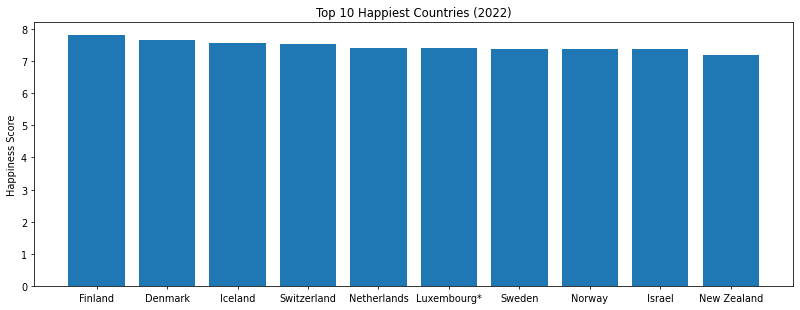

In [10]:
%matplotlib inline

interval = 10
figure(figsize=(14,5),dpi=70)
plt.title("Top 10 Happiest Countries (2022)")
plt.ylabel("Happiness Score")
score = data["Happiness score"].head(interval)
country = data["Country"].head(interval)
plt.bar(country,score)

In [11]:
# Maximum GDP per capita
gdp_max = data['GDP per capita'].max()
data[data['GDP per capita'] == gdp_max]

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
5,6,Luxembourg*,7.404,7.501,7.307,2.042,2.209,1.155,0.79,0.7,0.12,0.388


In [12]:
# Minimum GDP per capita
gdp_min = data['GDP per capita'].min()
data[data['GDP per capita'] == gdp_min]

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
107,108,Venezuela,4.925,5.051,4.8,2.79,0.0,0.968,0.578,0.283,0.225,0.082


In [13]:
# Position of Brazil
data[data["Country"] == "Brazil"]

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
37,38,Brazil,6.293,6.384,6.202,2.361,1.462,1.044,0.615,0.546,0.131,0.134


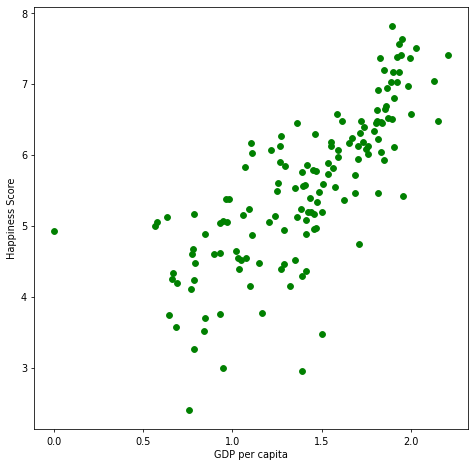

In [14]:
%matplotlib inline

figure(figsize=(8,8),dpi=70)
plt.xlabel("GDP per capita")
plt.ylabel("Happiness Score")
score = data["Happiness score"]
gdp = data["GDP per capita"]
plt.scatter(gdp,score,color="green")

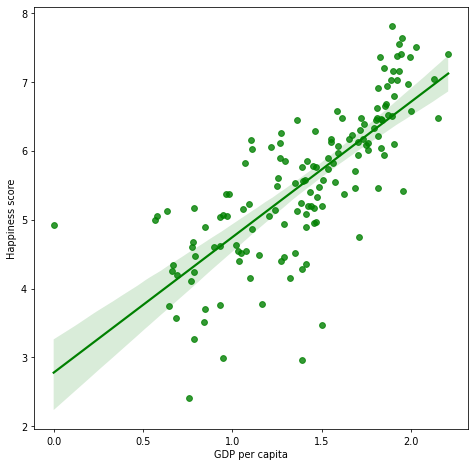

In [15]:
figure(figsize=(8,8),dpi=70)
sns.regplot(x = 'GDP per capita',y = 'Happiness score', data = data,color="green")

In [16]:
reg = linear_model.LinearRegression()
x = data[['GDP per capita']].values
y = data['Happiness score']
reg.fit(x,y)

LinearRegression()

In [17]:
b0 = float(reg.intercept_)
b1 = float(reg.coef_)
r_squared = reg.score(x,y)

print(f"The regression line is: happiness = {round(b0,4)} + {round(b1,4)}*gdp per capita \nR2 is {round(r_squared,4)}")



The regression line is: happiness = 2.7773 + 1.9684*gdp per capita 
R2 is 0.5832
